In [1]:
# libraries to import
import sys
sys.path.append('../utils/')
from helper_functions import *
from helper_plots import *

from linear_ucb import *
from linear_bandits_environment import *

import numpy as np

np.random.seed(0)

# Stochastic Linear Bandits

# Strategy 1: UCB Algorithm

The difference here is that instead of having confidence intervals, we have confidence ellipsoids.

The goal of the algorithm is to optimize the selection of actions (arms) in order to maximize the cumulative reward received over a series of rounds.

The key idea behind the algorithm is to model the relationship between the observed rewards and the features of each arm using linear regression, and then use the estimated regression coefficients to make informed decisions about which arm to select in each round.

### Steps of the algorithm



#### Initial setup

In [2]:
# Setting up parameters for the runs
n_arms = 6
n_features = 10

n_rounds = 700
noise = 0.1  
lambda_param = 0.5

n_simulations = 50

## Varying the number of items

### 10 items

In [3]:
n_arms = 10

# Running the algorithm
regrets_10_arms, all_theta_hat_10_arms, avg_total_diff_per_round_10_arms = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

NameError: name 'run_lin_ucb_average' is not defined

### 50 items

In [ ]:
n_simulations = 50

In [ ]:
n_arms = 50

# Running the algorithm
regrets_50_arms, all_theta_hat_50_arms, avg_total_diff_per_round_50_arms = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

### 100 items

In [ ]:
n_arms = 100

# Running the algorithm
regrets_100_arms, all_theta_hat_100_arms, avg_total_diff_per_round_100_arms = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

### 500 arms

In [ ]:
n_arms = 500

# Running the algorithm
regrets_500_arms, all_theta_hat_500_arms, avg_total_diff_per_round_500_arms = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

## Varying the number of arms when beta is fixed

### Regret for number of arms variations

In the plot below we see the cumulative regret for different variations of the number of arms over 50 simulated rounds.
we see that as the number of arms increases, the cumulative regret curve flattens out at a higher level. This is because the algorithm spends more time exploring to find the best arm as the number of arms increases.
We also see that as the number of arms increases, the gap between the flat part reduces. 

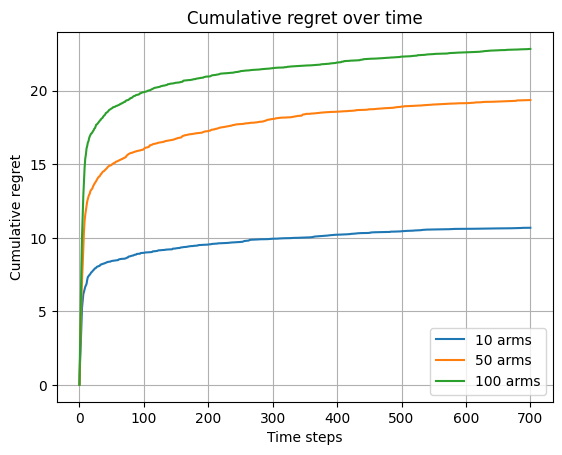

In [ ]:
regrets_for_arm_variation = [regrets_10_arms, regrets_50_arms, regrets_100_arms]
labels_for_arm_variation = ["10 arms", "50 arms", "100 arms"]

# Plotting the cumulative regret for different arm
plot_multiple_lines(regrets_for_arm_variation, labels_for_arm_variation, "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for number of arms variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of arms over 50 simulated rounds.
The trend we see is that as we increase the number of arms, the absolute difference between the true theta and the estimated theta decreases. This can be explained by the fact that when we have fewer arms, the likelihood of finding an arm whose feature vector is as close as possible to the true theta vector is lower than when we have more arms.

An interesting point is that setting the beta parameter to a constant make it so that we always pick the same optimal arm and therefore end up with a theta estimate that is that is further away than if we chose a beta parameter that is increasing logarithmically.

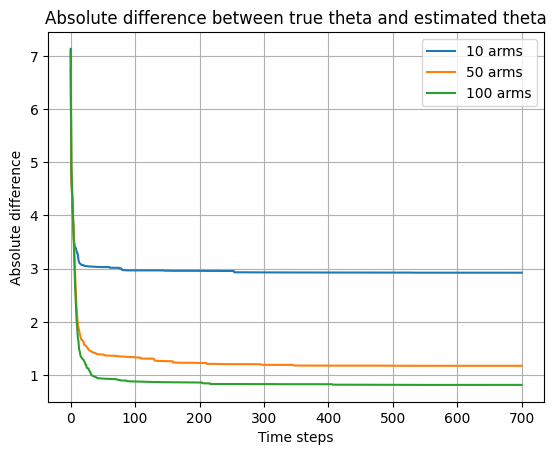

In [ ]:
diff_for_arm_variation = [avg_total_diff_per_round_10_arms, avg_total_diff_per_round_50_arms, avg_total_diff_per_round_100_arms]
labels_for_arm_variation = ["10 arms", "50 arms", "100 arms"]

# Plotting the difference between the true theta and the estimate theta_hat for different number of arms
plot_multiple_lines(diff_for_arm_variation, labels_for_arm_variation, "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")

## Varying the number of items - with beta increasing logarithmically

In [ ]:
# Setting up parameters for the runs
n_arms = 10
n_features = 10

n_rounds = 700
noise = 0.1  
lambda_param = 0.5

n_simulations = 50

### 10 items

In [ ]:
n_arms = 10

# Running the algorithm
regrets_10_arms_log, all_theta_hat_10_arms_log, avg_total_diff_per_round_10_arms_log = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param, False)

### 50 items

In [ ]:
n_arms = 50

# Running the algorithm
regrets_50_arms_log, all_theta_hat_50_arms_log, avg_total_diff_per_round_50_arms_log = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param, False)

### 100 items

In [ ]:
n_arms = 100

# Running the algorithm
regrets_100_arms_log, all_theta_hat_100_arms_log, avg_total_diff_per_round_100_arms_log = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param, False)

### 500 items

In [ ]:
n_arms = 500

# Running the algorithm
regrets_500_arms_log, all_theta_hat_500_arms_log, avg_total_diff_per_round_500_arms_log = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param, False)

### Regret for number of arms variations
In the plot below we see the cumulative regret for different variations of the number of arms over 50 simulated rounds.
we see that as the number of arms increases, the cumulative regret curve is situated at a higher level. This is because as the number of arms increases, the algorithm spends more time exploring to find the best arm.
We also see that as the number of arms increases, the gap between the flat part reduces.

Compared to the case where beta is fixed, when beta is set to a logarithmic function, the value of beta increases logarithmically with the number of rounds, which means that the algorithm can maintain a balance between exploration and exploitation over a longer period. This allows the algorithm to gradually shift from exploration to exploitation as more data is collected, resulting in better performance over the long run.

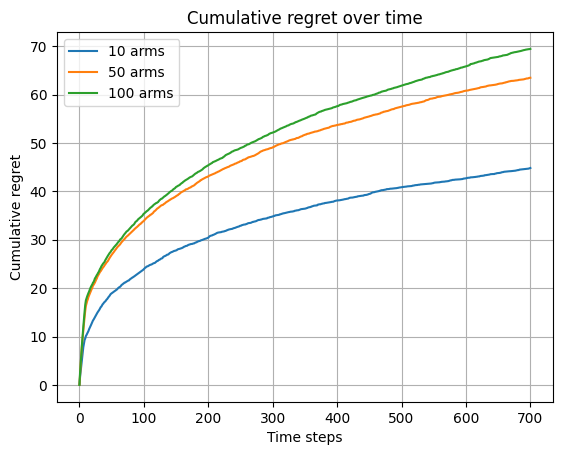

In [ ]:
regrets_for_arm_variation_log = [regrets_10_arms_log, regrets_50_arms_log, regrets_100_arms_log]
labels_for_arm_variation_log = ["10 arms", "50 arms", "100 arms"]

# Plotting the cumulative regret for different arm
plot_multiple_lines(regrets_for_arm_variation_log, labels_for_arm_variation_log, "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for number of arms variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of arms over 50 simulated rounds.
The trend we see is that as we increase the number of arms, the absolute difference between the true theta and the estimated theta decreases. This can be explained by the fact that when we have less arms, the likelihood of finding an arm whose feature vector is as close as possible to the true theta vector is lower than when we have more arms.

An interesting point, the fact that we set the beta parameter to a logarithmic function, it allows to maintain some level of exploration over a longer period. This is why by continuously not picking the optimal arm, we end up with a better approximation of the theta feature vector.

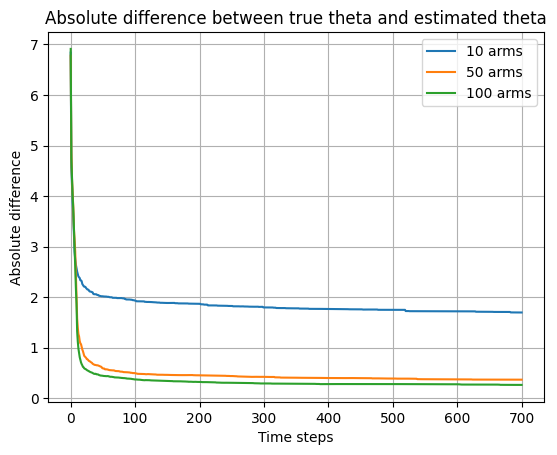

In [ ]:
diff_for_arm_variation_log = [avg_total_diff_per_round_10_arms_log, avg_total_diff_per_round_50_arms_log, avg_total_diff_per_round_100_arms_log]
labels_for_arm_variation_log = ["10 arms", "50 arms", "100 arms"]

# Plotting the difference between the true theta and the estimate theta_hat for different number of arms
plot_multiple_lines(diff_for_arm_variation_log, labels_for_arm_variation_log, "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")


## Varying the number of features

In [ ]:
# Setting up parameters for the runs
n_arms = 100


### 2 features

In [ ]:
n_features = 2

# Running the algorithm
regrets_2_features, all_theta_hat_2_features, avg_total_diff_per_round_2_features = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

### 10 features

In [ ]:
n_features = 2

# Running the algorithm
regrets_10_features, all_theta_hat_10_features, avg_total_diff_per_round_10_features = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

### 50 features

In [ ]:
n_features = 50

# Running the algorithm
regrets_50_features, all_theta_hat_50_features, avg_total_diff_per_round_50_features = run_lin_ucb_average(n_simulations, n_arms, n_features, n_rounds, noise, lambda_param)

## Varying the number of features

By keeping the number of arms the same: 100 arms

### Regret for number of features variations

In the plot below we see the cumulative regret for different variations for the number of features over 50 simulated rounds. We can see that as we increase the number of features, the cumulative regrets grows. 
We can see that as we increase the number of features, the cumulative regrets grows. 
As the number of features increases, the number of possible linear combinations to estimate the optimal one also increases which makes the algorithm explore for a longer period of time.

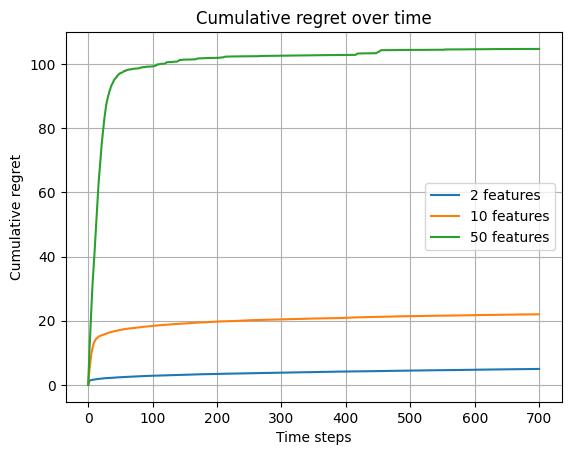

In [ ]:
regrets_for_feature_variation = [regrets_2_features, regrets_10_features, regrets_50_features]
labels_for_feature_variation = ["2 features", "10 features", "50 features"]

# Plotting the cumulative regret for different arm
plot_multiple_lines(regrets_for_feature_variation, labels_for_feature_variation, "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for the number of features variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of features over 50 simulated rounds.

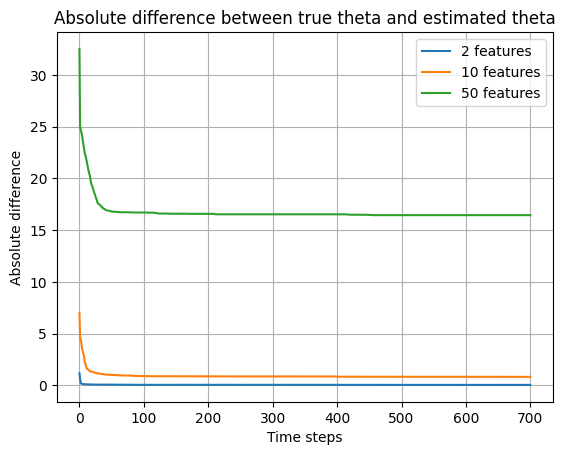

In [ ]:
diff_for_feature_variation = [avg_total_diff_per_round_2_features, avg_total_diff_per_round_10_features, avg_total_diff_per_round_50_features]
labels_for_feature_variation = ["2 features", "10 features", "50 features"]

# Plotting the difference between the true theta and the estimate theta_hat for different number of features
plot_multiple_lines(diff_for_feature_variation, labels_for_feature_variation, "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")

## Varying lambda parameter

### lambda = 0.01

In [ ]:
# Setting up parameters for the runs
n_arms = 50
n_features = 10
item_features = np.random.uniform(low=-1, high=1, size=(n_features, n_arms))
true_theta = np.random.uniform(low=-1, high=1, size=(n_features, 1))

n_rounds = 1000
noise = 0.1  
lambda_param = 0.01

n_simulations = 50

In [ ]:
# Running the algorithm
regrets_lambda_0_01, all_theta_hat_lambda_0_01 = run_lin_ucb_average(n_simulations, n_arms, n_features, item_features, n_rounds, true_theta, noise, lambda_param)

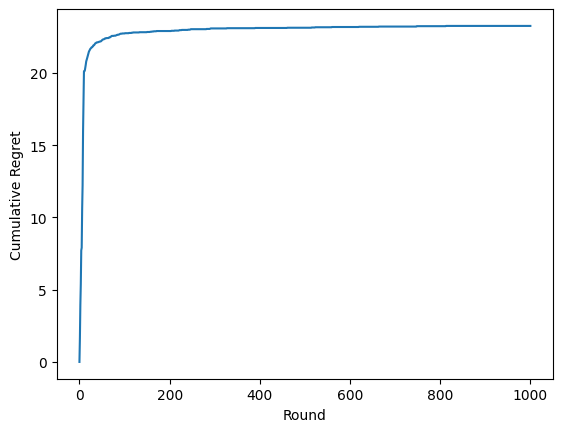

In [ ]:
# Plotting the cumulative regret
plot_regret(regrets_lambda_0_01)

In [ ]:
# Calculate the difference per round
diff_per_rounds_lambda_0_01 = diff_theta_hat_true_theta(true_theta, all_theta_hat_lambda_0_01)

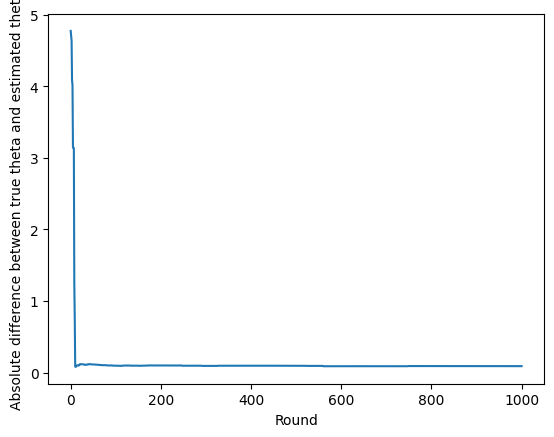

In [ ]:
# Plotting the difference between the true theta and the estimate theta_hat
plot_diff_theta_hat_true_theta(diff_per_rounds_lambda_0_01)

### lambda = 0.1

In [ ]:
# Setting up parameters for the runs
n_arms = 50
n_features = 10
item_features = np.random.uniform(low=-1, high=1, size=(n_features, n_arms))
true_theta = np.random.uniform(low=-1, high=1, size=(n_features, 1))

n_rounds = 1000
noise = 0.1  
lambda_param = 0.1

n_simulations = 50

In [ ]:
# Running the algorithm
regrets_lambda_0_1, all_theta_hat_lambda_0_1 = run_lin_ucb_average(n_simulations, n_arms, n_features, item_features, n_rounds, true_theta, noise, lambda_param)

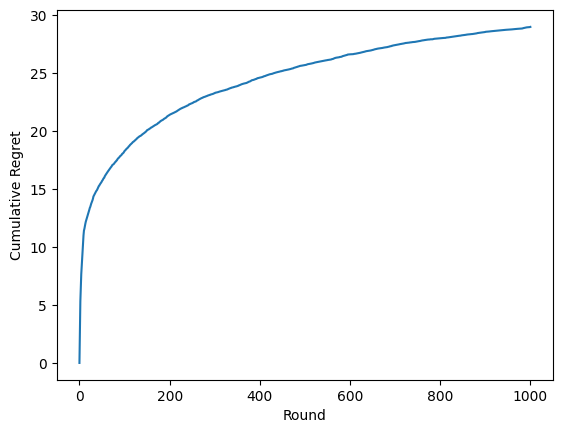

In [ ]:
# Plotting the cumulative regret
plot_regret(regrets_lambda_0_1)

In [ ]:
# Calculate the difference per round
diff_per_rounds_lambda_0_1 = diff_theta_hat_true_theta(true_theta, all_theta_hat_lambda_0_1)

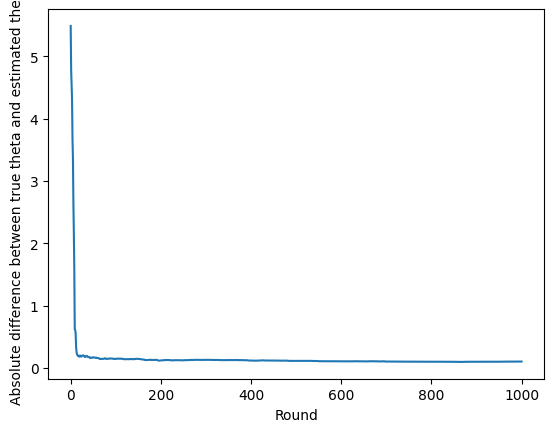

In [ ]:
# Plotting the difference between the true theta and the estimate theta_hat
plot_diff_theta_hat_true_theta(diff_per_rounds_lambda_0_1)

### lambda = 0.5


In [ ]:
# Setting up parameters for the runs
n_arms = 50
n_features = 10
item_features = np.random.uniform(low=-1, high=1, size=(n_features, n_arms))
true_theta = np.random.uniform(low=-1, high=1, size=(n_features, 1))

n_rounds = 1000
noise = 0.1  
lambda_param = 0.5

n_simulations = 50

In [ ]:
# Running the algorithm
regrets_lambda_0_5, all_theta_hat_lambda_0_5 = run_lin_ucb_average(n_simulations, n_arms, n_features, item_features, n_rounds, true_theta, noise, lambda_param)

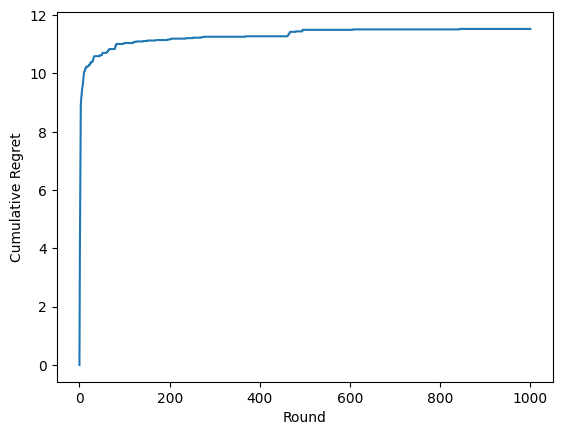

In [ ]:
# Plotting the cumulative regret
plot_regret(regrets_lambda_0_5)

In [ ]:
# Calculate the difference per round
diff_per_rounds_lambda_0_5 = diff_theta_hat_true_theta(true_theta, all_theta_hat_lambda_0_5)

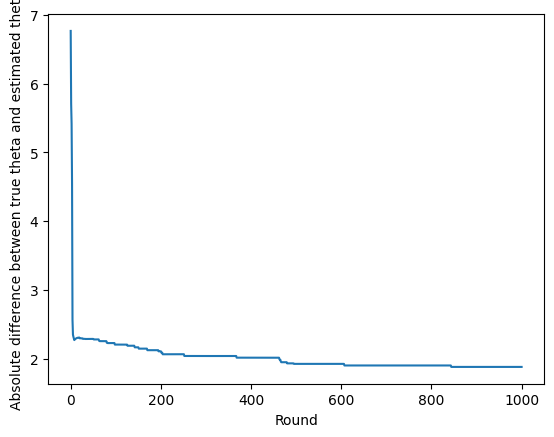

In [ ]:
# Plotting the difference between the true theta and the estimate theta_hat
plot_diff_theta_hat_true_theta(diff_per_rounds_lambda_0_5)

### lambda = 1.0

In [ ]:
# Setting up parameters for the runs
n_arms = 50
n_features = 10
item_features = np.random.uniform(low=-1, high=1, size=(n_features, n_arms))
true_theta = np.random.uniform(low=-1, high=1, size=(n_features, 1))

n_rounds = 1000
noise = 0.1  
lambda_param = 1.0

n_simulations = 50

In [ ]:
# Running the algorithm
regrets_lambda_1, all_theta_hat_lambda_1 = run_lin_ucb_average(n_simulations, n_arms, n_features, item_features, n_rounds, true_theta, noise, lambda_param)

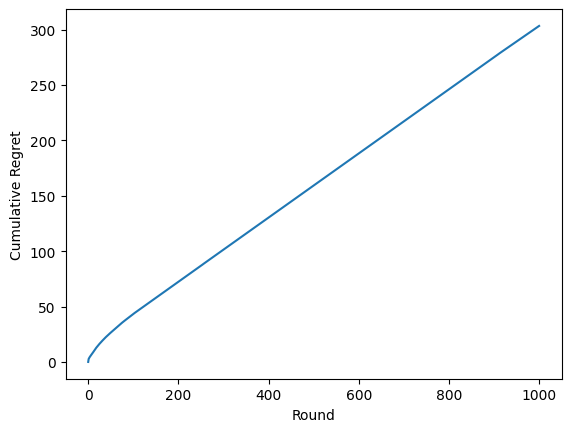

In [ ]:
# Plotting the cumulative regret
plot_regret(regrets_lambda_1)

In [ ]:
# Calculate the difference per round
diff_per_rounds_lambda_1 = diff_theta_hat_true_theta(true_theta, all_theta_hat_lambda_1)

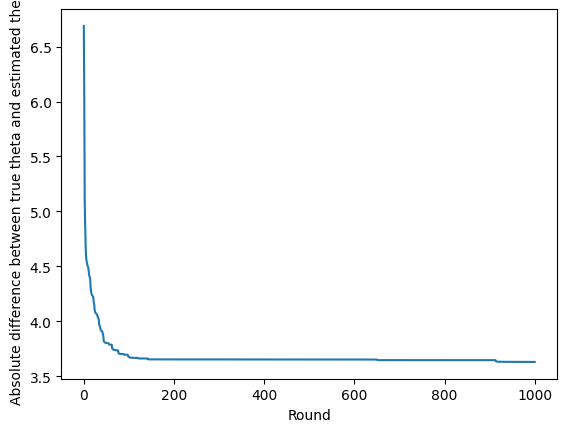

In [ ]:
# Plotting the difference between the true theta and the estimate theta_hat
plot_diff_theta_hat_true_theta(diff_per_rounds_lambda_1)

### Varying the number of arms

By keeping the number of features the same: 10 features, we see that as the number of arm increases, the cumulative regret converges faster (the logarithmic plot flattens out faster).

This leads to a cumulative regret being greater at step 1000 as we increase the number of arms.

This phenomenon can be explained by the fact that when there are more arms to chose, we can chose one arm that has is closest to the true feature vector theta. By increasing the number of arms, we increase the likelihood of finding arms that fits the user the best. Therefore, it is logical that we converge to an estimate faster than with less arms.

### Regret for number of arms variations

In the plot below we see the cumulative regret for different variations of the number of arms over 50 simulated rounds.

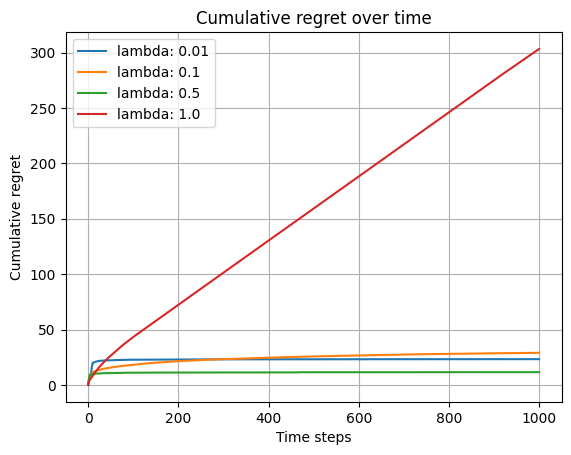

In [ ]:
regrets_for_lambda_variation = [regrets_lambda_0_01, regrets_lambda_0_1, regrets_lambda_0_5, regrets_lambda_1]
labels_for_lambda_variation = ["lambda: 0.01", "lambda: 0.1", "lambda: 0.5", "lambda: 1.0"]

# Plotting the cumulative regret for different arm
plot_multiple_lines(regrets_for_lambda_variation, labels_for_lambda_variation, "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for number of arms variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of arms over 50 simulated rounds.

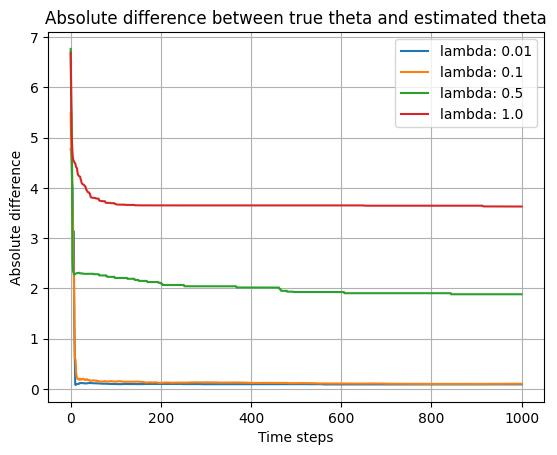

In [ ]:
diff_for_lambda_variation = [diff_per_rounds_lambda_0_01, diff_per_rounds_lambda_0_1, diff_per_rounds_lambda_0_5, diff_per_rounds_lambda_1]
labels_for_lambda_variation = ["lambda: 0.01", "lambda: 0.1", "lambda: 0.5", "lambda: 1.0"]

# Plotting the difference between the true theta and the estimate theta_hat for different number of arms
plot_multiple_lines(diff_for_lambda_variation, labels_for_lambda_variation, "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")
